In [1]:
import numpy as np
from matplotlib import pyplot as plt
np.set_printoptions(linewidth=1000)

TODO: Add more comments

In [2]:
npoints = 100
N = npoints
n_stencil = 2
length = 2.0*np.pi
x = np.linspace(0, length, npoints, endpoint=False)
h = length/npoints
wavenumber = 10
f_interior = np.sin(wavenumber*x)
df_exact = wavenumber* np.cos(wavenumber*x)

In [3]:
# For sixth order, the stencil should be of size 2
assert n_stencil == 2

In [4]:
function_values = np.zeros(npoints + 4)
function_values[n_stencil:-n_stencil] = f_interior

function_values[npoints + n_stencil] = f_interior[0]
function_values[npoints + n_stencil + 1] = f_interior[1]

function_values[0] = f_interior[npoints - n_stencil]
function_values[1] = f_interior[npoints - n_stencil + 1]

In [5]:
A = np.zeros((N, N))
b = np.zeros(N)

# Eqn (2.1.7) from Compact Finite Difunction_valueserences with Spectral-like Accuracy, Lele, 1992, JCP.
alpha = 1.0/3.0
coefunction_values_a = 14./9.
coefunction_values_b = 1./9.

main = np.ones((1, N))[0]
diagonal = alpha*np.ones((1, N-1))[0]
A = np.diag(main, 0) + np.diag(diagonal, -1) + np.diag(diagonal, 1)

# Apply periodic boundary condition
A[0, -1] = alpha
A[-1, 0] = alpha

# Generate the right-hand side
a1 = 7.0/(9.0*h)
a2 = 1.0/(36.*h)

# get the RHS
rhs = np.zeros(npoints)
for i in range(2, npoints+2):
    rhs[i-2] = a1*(function_values[i+1] - function_values[i-1]) + a2*(function_values[i+2] - function_values[i-2])

df = np.linalg.solve(A, rhs)

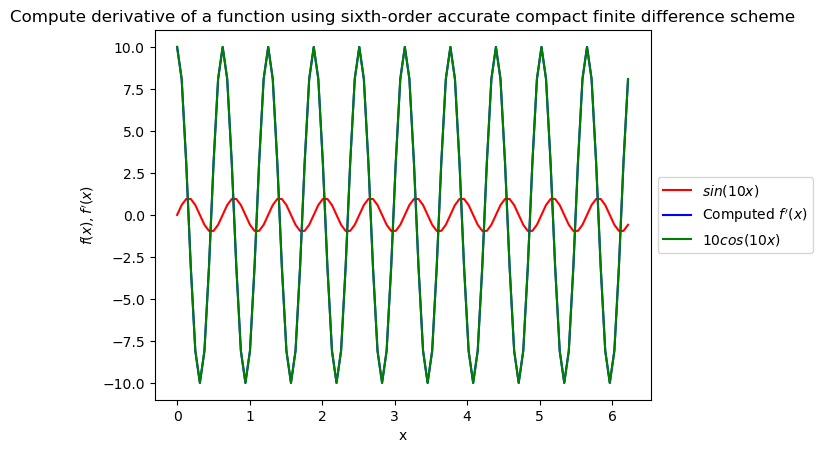

In [12]:
plt.plot(x, f_interior, color='red', label=f'$sin({wavenumber}x)$')
plt.plot(x, df, color='blue', label=f'Computed $f\'(x)$')
plt.plot(x, df_exact, color='green', label=f'${wavenumber}cos({wavenumber}x)$')

plt.xlabel(f'x')
plt.ylabel(f'$f(x), f\'(x)$')
plt.title(f'Compute derivative of a function using sixth-order accurate compact finite difference scheme')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))